In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


In [2]:
df = pd.read_csv("../data/WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df['quality'].value_counts().sort_index()


quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

In [7]:
def quality_label(q):
    if q <= 5:
        return "Low"
    elif q == 6:
        return "Medium"
    else:
        return "High"

df['quality_label'] = df['quality'].apply(quality_label)
df[['quality', 'quality_label']].head()


,quality,quality_label
0,5,Low
1,5,Low
2,5,Low
3,6,Medium
4,5,Low


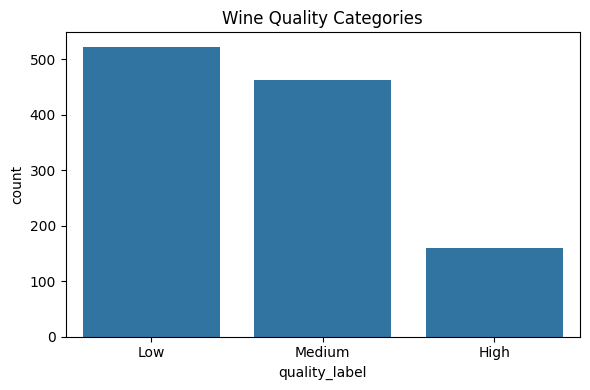

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality_label', data=df)
plt.title("Wine Quality Categories")
plt.tight_layout()
plt.savefig("../visuals/quality_distribution.png")
plt.show()


In [9]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)


In [13]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.6986899563318777
              precision    recall  f1-score   support

        High       0.80      0.62      0.70        32
         Low       0.74      0.74      0.74       105
      Medium       0.63      0.67      0.65        92

    accuracy                           0.70       229
   macro avg       0.72      0.68      0.70       229
weighted avg       0.70      0.70      0.70       229



In [14]:
sgd_model = SGDClassifier(
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

sgd_model.fit(X_train_scaled, y_train)

sgd_preds = sgd_model.predict(X_test_scaled)


In [15]:
print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))
print(classification_report(y_test, sgd_preds))


SGD Accuracy: 0.5720524017467249
              precision    recall  f1-score   support

        High       0.43      0.41      0.42        32
         Low       0.69      0.65      0.67       105
      Medium       0.50      0.54      0.52        92

    accuracy                           0.57       229
   macro avg       0.54      0.53      0.54       229
weighted avg       0.58      0.57      0.57       229



In [16]:
svm_model = SVC(kernel='rbf', C=1.0)

svm_model.fit(X_train_scaled, y_train)

svm_preds = svm_model.predict(X_test_scaled)


In [17]:
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


SVM Accuracy: 0.6462882096069869
              precision    recall  f1-score   support

        High       0.59      0.31      0.41        32
         Low       0.74      0.74      0.74       105
      Medium       0.56      0.65      0.60        92

    accuracy                           0.65       229
   macro avg       0.63      0.57      0.58       229
weighted avg       0.65      0.65      0.64       229



In [18]:
results = pd.DataFrame({
    "Model": ["Random Forest", "SGD Classifier", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, sgd_preds),
        accuracy_score(y_test, svm_preds)
    ]
})

results


,Model,Accuracy
0,Random Forest,0.698690
1,SGD Classifier,0.572052
2,SVM,0.646288


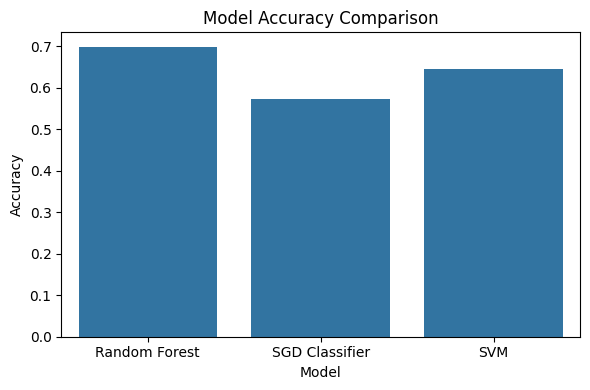

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.savefig("../visuals/model_comparison.png")
plt.show()


In [20]:
from sklearn.metrics import ConfusionMatrixDisplay


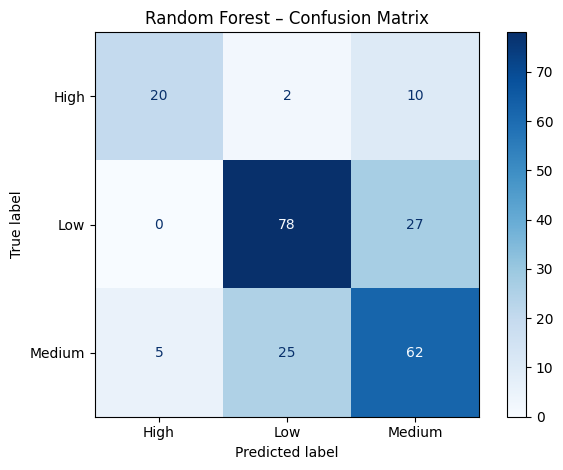

In [21]:
ConfusionMatrixDisplay.from_predictions(
    y_test, rf_preds, cmap="Blues"
)
plt.title("Random Forest – Confusion Matrix")
plt.tight_layout()
plt.savefig("../visuals/rf_confusion_matrix.png")
plt.show()


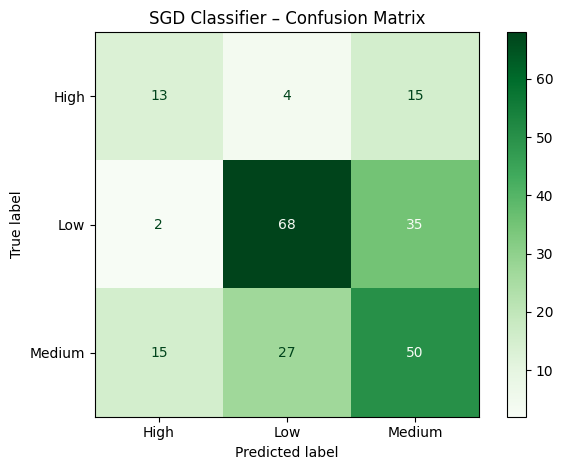

In [22]:
ConfusionMatrixDisplay.from_predictions(
    y_test, sgd_preds, cmap="Greens"
)
plt.title("SGD Classifier – Confusion Matrix")
plt.tight_layout()
plt.savefig("../visuals/sgd_confusion_matrix.png")
plt.show()


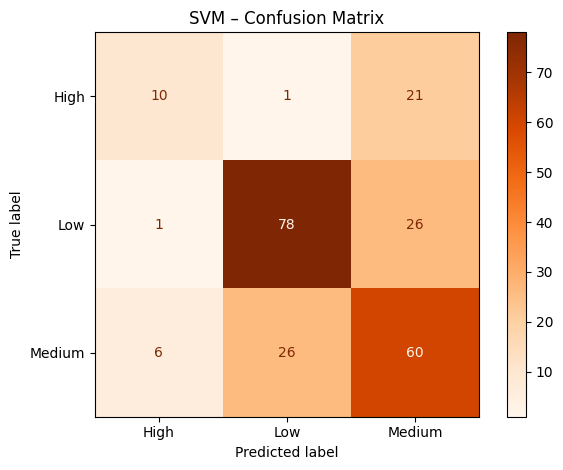

In [23]:
ConfusionMatrixDisplay.from_predictions(
    y_test, svm_preds, cmap="Oranges"
)
plt.title("SVM – Confusion Matrix")
plt.tight_layout()
plt.savefig("../visuals/svm_confusion_matrix.png")
plt.show()


In [24]:
importances = rf_model.feature_importances_

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


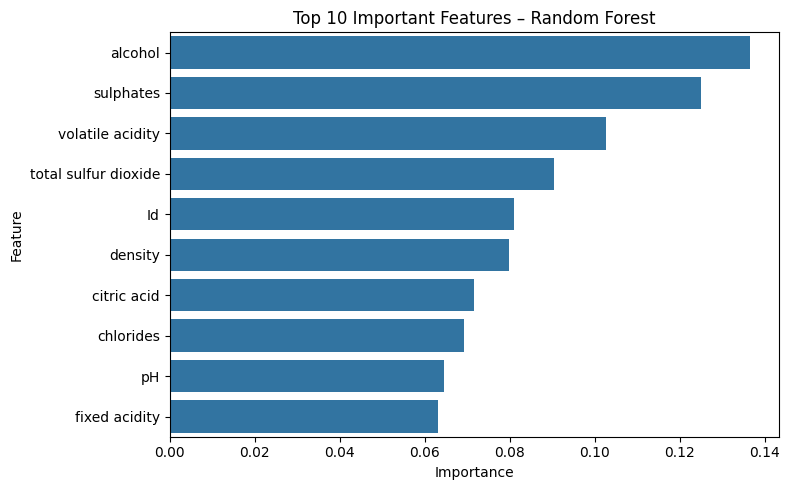

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Important Features – Random Forest")
plt.tight_layout()
plt.savefig("../visuals/feature_importance.png")
plt.show()


### Final Model Selection

Among the three models tested:
- **Random Forest** achieved the highest and most stable accuracy
- **SVM** performed well but required careful scaling and tuning
- **SGD Classifier** was faster but less accurate

Based on performance and interpretability, **Random Forest** was selected
as the final model for wine quality prediction.


In [26]:
results.to_csv("../visuals/model_results.csv", index=False)
